Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("sample_data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Impute missing 'Age' values with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"Missing 'Age' values filled with median: {median_age}")

# Impute missing 'Embarked' values with the mode
mode_embarked = df['Embarked'].mode()[0]  # mode() returns a Series, so we take the first element
df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing 'Embarked' values filled with mode: {mode_embarked}")

# Drop the 'Cabin' column due to a large number of missing values
df.drop('Cabin', axis=1, inplace=True)
print("The 'Cabin' column has been dropped.")

# Verify that missing values have been handled
print("\nNumber of missing values after handling:")
print(df.isnull().sum())

Missing 'Age' values filled with median: 28.0
Missing 'Embarked' values filled with mode: S
The 'Cabin' column has been dropped.

Number of missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-5-e73b6ab49c3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
<ipython-input-5-e73b6ab49c3f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

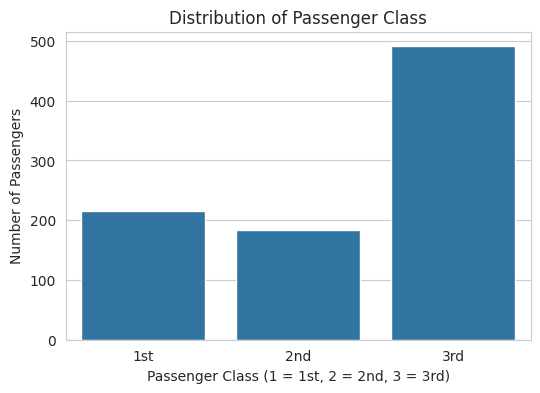

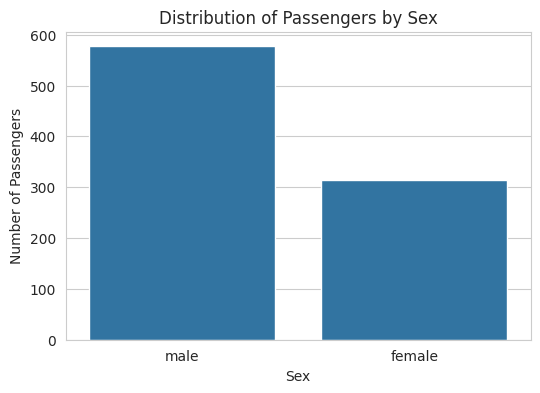

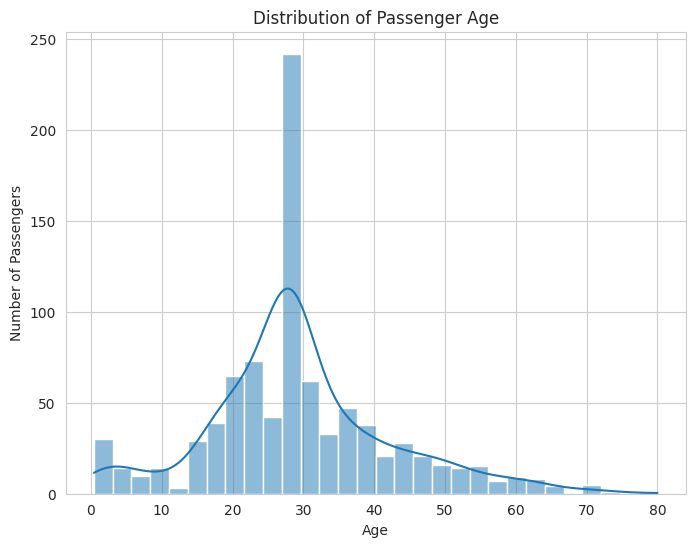

In [6]:
# Set a nicer style for the plots
sns.set_style("whitegrid")

# Distribution of Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.show()

# Distribution of Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

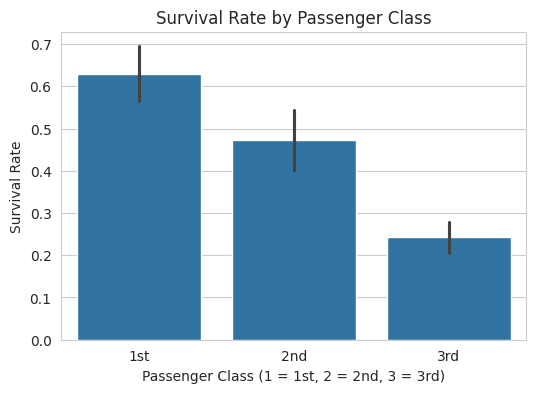

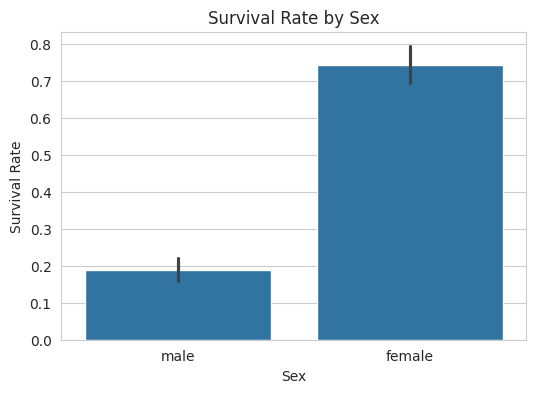

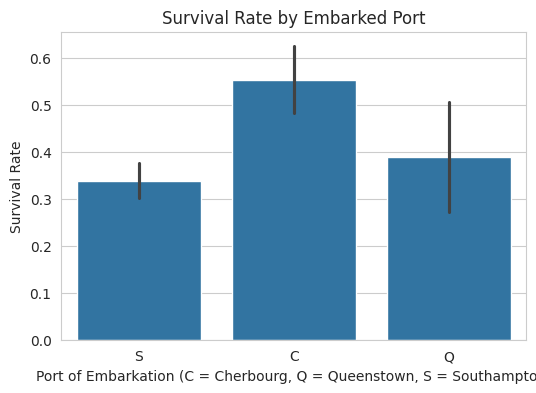

In [7]:
# Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.show()

# Survival Rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rate by Embarked Port
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Survival Rate')
plt.show()

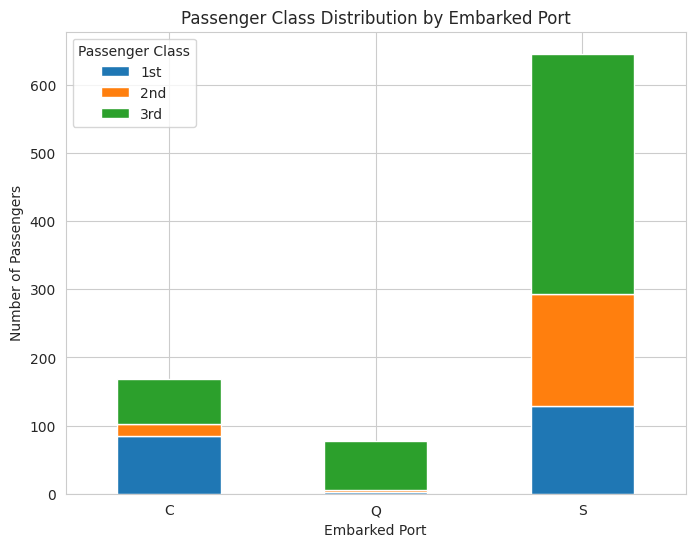

In [8]:
# Create a contingency table to count the number of passengers in each class for each embarkation port
embarked_class_counts = pd.crosstab(df['Embarked'], df['Pclass'])

# Create the stacked bar chart
embarked_class_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Passenger Class Distribution by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Passenger Class', labels=['1st', '2nd', '3rd'])
plt.show()

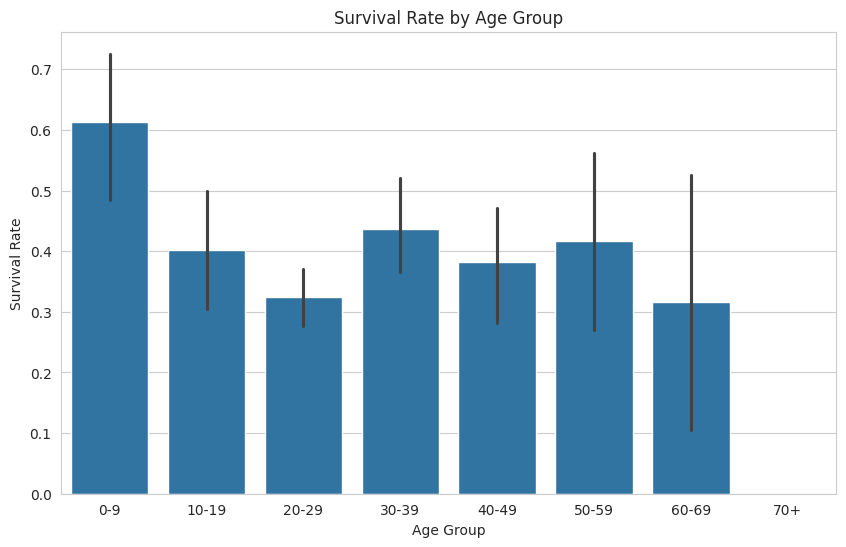

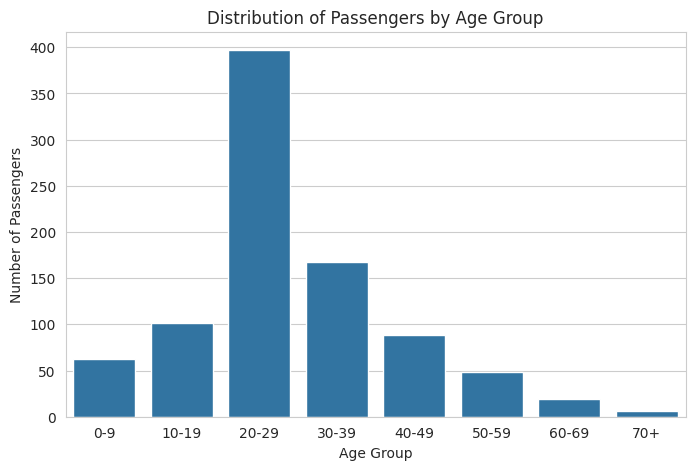

In [9]:
# Create age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Survival Rate by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Optional: You can also look at the distribution of age groups
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup', order=labels) # Ensure the order is correct
plt.title('Distribution of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.show()

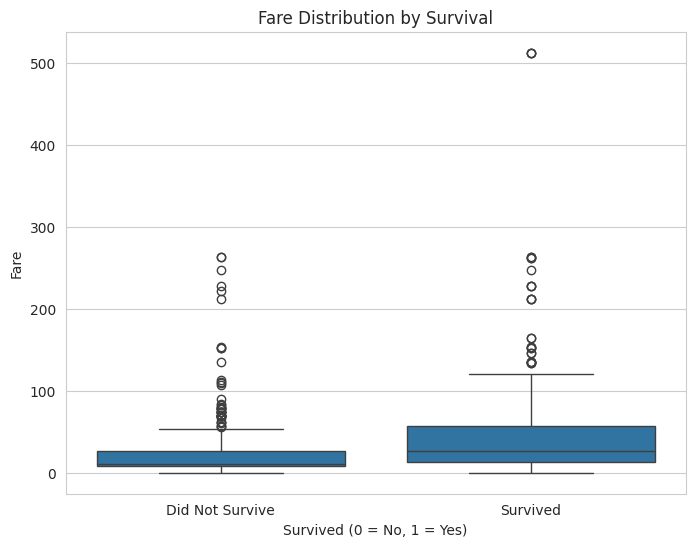

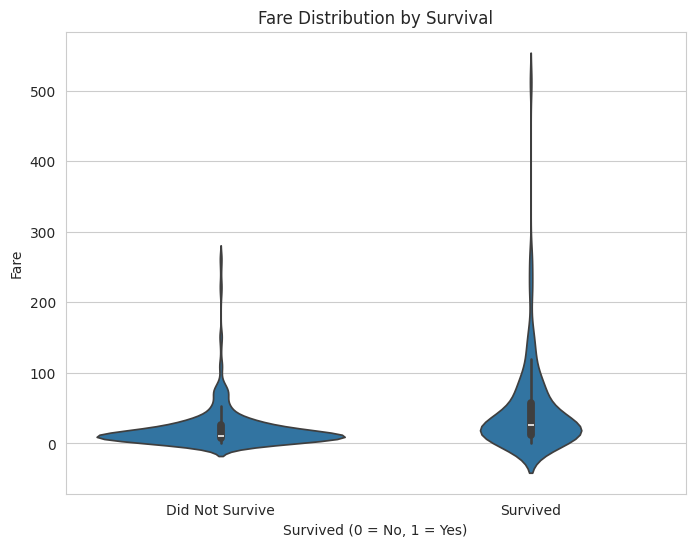

In [10]:
# Box Plot of Fare by Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

# Optional: Violin Plot for a smoother distribution view
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()